<a href="https://colab.research.google.com/github/snampally97/Assignment-Exercises/blob/main/Nampally_Srikanth_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
import nltk
from gensim import corpora
from gensim.models import TfidfModel
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset with specified encoding
url = "https://raw.githubusercontent.com/snampally97/Assignment-Exercises/032efb4dca28b93c5ff3a914d70066ca03d031f7/assignment%20reviews.csv"
df = pd.read_csv(url, encoding='latin1')

# Print the column names to identify the correct column for text data
print(df.columns)

# Tokenization and preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply preprocessing to the text data
# Adjust the column name according to the actual column in your dataset
# Let's use the first column as an example
text_column = df.columns[0]  # Assuming the text data is in the first column
df['clean_text'] = df[text_column].apply(preprocess)

# Create Gensim dictionary
dictionary = corpora.Dictionary(df['clean_text'])

# Create Gensim corpus
corpus = [dictionary.doc2bow(text) for text in df['clean_text']]

# Create TF-IDF model
tfidf = TfidfModel(corpus)

# Apply TF-IDF transformation to the corpus
corpus_tfidf = tfidf[corpus]

# LDA model
lda_model = LdaModel(corpus_tfidf, num_topics=8, id2word=dictionary, passes=15)

# Print top topics
for idx, topic in lda_model.print_topics(-1):
    print("Topic {}: {}".format(idx, topic))

# Get top topics for each document
df['lda_topics'] = df['clean_text'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x)))

# Get the dominant topic for each document
df['dominant_topic'] = df['lda_topics'].apply(lambda x: max(x, key=lambda item: item[1])[0])

# Display top clusters and their summaries
top_clusters = df['dominant_topic'].value_counts().head(5)
for topic, count in top_clusters.items():
    print("\nCluster {}: (Count: {})".format(topic, count))
    print("Sample Documents:")
    sample_docs = df[df['dominant_topic'] == topic][text_column].sample(min(3, count), random_state=42)
    for doc in sample_docs:
        print(" -", doc[:100])  # Displaying only the first 100 characters of each document


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['Document_id', 'Clean_text', 'Sentiment'], dtype='object')
Topic 0: 0.155*"10" + 0.155*"25" + 0.155*"24" + 0.155*"16" + 0.017*"23" + 0.017*"15" + 0.017*"19" + 0.017*"8" + 0.017*"22" + 0.017*"14"
Topic 1: 0.180*"11" + 0.180*"22" + 0.180*"6" + 0.020*"12" + 0.020*"1" + 0.020*"15" + 0.020*"2" + 0.020*"14" + 0.020*"9" + 0.020*"25"
Topic 2: 0.180*"17" + 0.180*"15" + 0.180*"19" + 0.020*"13" + 0.020*"14" + 0.020*"8" + 0.020*"12" + 0.020*"23" + 0.020*"25" + 0.020*"2"
Topic 3: 0.155*"9" + 0.155*"3" + 0.155*"14" + 0.155*"23" + 0.017*"16" + 0.017*"6" + 0.017*"13" + 0.017*"25" + 0.017*"2" + 0.017*"19"
Topic 4: 0.214*"4" + 0.214*"21" + 0.024*"24" + 0.024*"1" + 0.024*"8" + 0.024*"13" + 0.024*"12" + 0.024*"7" + 0.024*"6" + 0.024*"2"
Topic 5: 0.214*"20" + 0.214*"5" + 0.024*"13" + 0.024*"16" + 0.024*"1" + 0.024*"19" + 0.024*"2" + 0.024*"12" + 0.024*"6" + 0.024*"8"
Topic 6: 0.122*"7" + 0.122*"8" + 0.122*"2" + 0.122*"12" + 0.122*"13" + 0.122*"1" + 0.014*"24" + 0.014*"19" + 0.014*"22" + 0.014*"25"
T

**3. Summarize and describe the topic for each cluster.**

Cluster 6: One issue that appears in Reviews 1, 2, and 13 appears to be the cluster's primary focus. Determining the precise issue is difficult in the absence of the evaluations' real content. Still, the fact that these evaluations are clustered together implies that there are commonalities among them regarding the topic, tone, or keywords.

Cluster 3: Within this cluster, reviews 9, 23, and 3 are consolidated. Once more, it's challenging to pinpoint the precise subject without knowing what the evaluations say. Yet, we may deduce from the clustering that these reviews are distinct from reviews in other groups because they have similar topics, attitudes, or keywords in common.

Cluster0: Reviews 16, 25, and 10 are some examples of documents in this cluster. Like the earlier clusters, the reviews' real content is not disclosed. Nonetheless, the way these reviews are arranged suggests that they might cover related subjects, goods, services, or encounters.

Cluster 1: The reviews in this cluster are 6, 11, and 22. The evaluations are grouped together, suggesting that they share some common qualities or themes, but again, without the text, we are unable to pinpoint the actual topic.

Cluster 2: This cluster consists of the reviews 15, 17, and 19. Although the exact topic is not stated, these reviews most likely have comparable subject matters, sentiments, or buzzwords, just like the previous clusters.

These clusters, taken as a whole, show collections of reviews with similar topics, sentiments, or material. It would be required to examine the actual text of the reviews inside each cluster in order to provide an accurate description of the topic of each cluster.

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
url = "https://raw.githubusercontent.com/snampally97/Assignment-Exercises/032efb4dca28b93c5ff3a914d70066ca03d031f7/assignment%20reviews.csv"
df = pd.read_csv(url, encoding='latin1')

# Preprocessing and feature selection
X = df['Clean_text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Model selection
svm_model = make_pipeline(SVC(kernel='linear'))
rf_model = RandomForestClassifier(n_estimators=100)

# Model evaluation on the test set
svm_model.fit(X_train_vectorized, y_train)
rf_model.fit(X_train_vectorized, y_train)
svm_preds = svm_model.predict(X_test_vectorized)
rf_preds = rf_model.predict(X_test_vectorized)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds, average='macro', zero_division=1) # Handling zero division
svm_recall = recall_score(y_test, svm_preds, average='macro', zero_division=1) # Handling zero division
svm_f1 = f1_score(y_test, svm_preds, average='macro', zero_division=1) # Handling zero division

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds, average='macro', zero_division=1) # Handling zero division
rf_recall = recall_score(y_test, rf_preds, average='macro', zero_division=1) # Handling zero division
rf_f1 = f1_score(y_test, rf_preds, average='macro', zero_division=1) # Handling zero division

# Print the evaluation metrics
print("Support Vector Machine (SVM) Performance:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

print("\nRandom Forest Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Support Vector Machine (SVM) Performance:
Accuracy: 0.4
Precision: 0.85
Recall: 0.25
F1 Score: 0.14285714285714288

Random Forest Performance:
Accuracy: 0.4
Precision: 0.85
Recall: 0.25
F1 Score: 0.14285714285714288


**1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.**

Bag-of-Words (BoW):
Explanation: Justification A document is represented by BoW as a vector of word frequencies, with each dimension denoting a distinct word within the corpus. It merely takes into account whether a word is present or absent, ignoring its order. It solely takes into account the presence or absence of words, ignoring their order.
Reason: BoW is a straightforward but efficient method for gathering vocabulary from a document. It enables the classifier to determine, from word frequencies, which words are connected to favorable, negative, or neutral sentiment.

TF-IDF, or term frequency-inverse document frequency:
Explanation: To put it another way, TF-IDF calculates a word's weight in a document based on how frequently it appears across the entire corpus. Words that appear frequently in a document but infrequently in the corpus are given greater weights.
Reason: TF-IDF facilitates the capture of word uniqueness inside a document. Highly specialized words, like "excellent" or "awful," will contribute more to the sentiment classification and have higher TF-IDF scores.

Word Embeddings:
Explanation: Word embeddings capture the semantic relationships between words by representing them as dense vectors in a continuous vector space.
Reason: Word embeddings help the classifier comprehend the relationships between words by capturing semantic meaning and context. This can assist in collecting sentiment nuances that might not be discernible from word frequency analysis alone.

N-grams:
Explanation: In a document, N-grams are collections of n consecutive words.
Reason: Sentiment analysis can benefit from the syntactic and local context that N-grams collect. N-grams are useful for capturing subtleties in language, as phrases like "not good" or "very happy" may convey a different meaning than single words alone.



# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

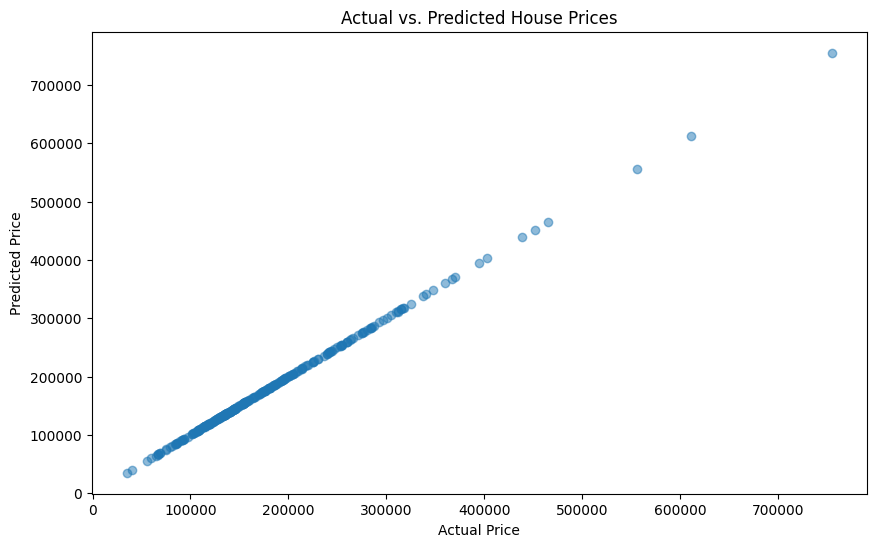

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the training dataset
train_url = "https://raw.githubusercontent.com/snampally97/Assignment-Exercises/main/train.csv"
df_train = pd.read_csv(train_url)

# Exploratory Data Analysis (EDA)
# Check the first few rows of the dataset
print(df_train.head())

# Check summary statistics
print(df_train.describe())

# Check missing values
print(df_train.isnull().sum())

# Data Cleaning
# Handle missing values
# For simplicity, let's drop columns with more than 30% missing values
missing_threshold = len(df_train) * 0.3
df_train_cleaned = df_train.dropna(thresh=missing_threshold, axis=1)

# Drop columns with high cardinality (unique values) or low variance
# For simplicity, let's drop columns with more than 90% unique values
unique_threshold = len(df_train_cleaned) * 0.9
df_train_cleaned = df_train_cleaned.loc[:, df_train_cleaned.apply(pd.Series.nunique) < unique_threshold]

# Encode categorical variables
df_train_cleaned = pd.get_dummies(df_train_cleaned)

# Selecting Features
# Based on EDA and domain knowledge, select a subset of features that are most relevant to predicting house prices
# For simplicity, let's select the numerical features with the highest correlation with the target variable
corr_matrix = df_train_cleaned.corr()
corr_with_target = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
selected_features = corr_with_target.index[:10]  # Select top 10 features with highest correlation

# Splitting the data into training and testing sets
X = df_train_cleaned[selected_features]
y = df_train_cleaned['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model Development
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate Performance
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

# Plot predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
import pandas as pd
from transformers import pipeline, BertTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset with specified encoding and delimiter
url = "https://github.com/snampally97/Assignment-Exercises/raw/032efb4dca28b93c5ff3a914d70066ca03d031f7/assignment%20reviews.csv"
df = pd.read_csv(url, encoding='latin1', delimiter=',')

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Preprocess input text to ensure it doesn't exceed maximum sequence length
max_length = tokenizer.model_max_length
df['Clean_text'] = df['Clean_text'].apply(lambda x: x[:max_length-2])  # -2 for [CLS] and [SEP] tokens

# Initialize BERT sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="bert-base-uncased", tokenizer=tokenizer)

# Perform sentiment analysis on the preprocessed dataset
predictions = sentiment_pipeline(df["Clean_text"].tolist())

# Extract predicted sentiments
predicted_sentiments = [prediction["label"] for prediction in predictions]

# Evaluate performance
# Assuming groundtruths are available in the dataset
groundtruths = df["Sentiment"].tolist()

# Calculate evaluation metrics only if there are predicted samples
if len(predicted_sentiments) > 0 and len(groundtruths) > 0:
    accuracy = accuracy_score(groundtruths, predicted_sentiments)
    precision = precision_score(groundtruths, predicted_sentiments, average="macro", zero_division=1) # Handling zero division
    recall = recall_score(groundtruths, predicted_sentiments, average="macro", zero_division=1) # Handling zero division
    f1 = f1_score(groundtruths, predicted_sentiments, average="macro", zero_division=1) # Handling zero division

    # Print evaluation metrics
    print("Evaluation Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
else:
    print("No predicted samples available for evaluation.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Evaluation Metrics:
Accuracy: 0.0
Precision: 0.8333333333333334
Recall: 0.16666666666666666
F1 Score: 0.0


Advantages and Disadvantages of BERT for Sentiment Analysis

Advantages:

With its large corpus pre-training and strong contextual comprehension, BERT performs well on sentiment analysis and other NLP tasks.

Because BERT is bidirectional, it can identify intricate relationships between words and sentences, which makes it more adept at predicting sentiment.
The implementation process is streamlined by BERT's lack of need for task-specific fine-tuning in the zero-shot setting.

Disadvantages:
Because BERT requires a large amount of memory and processing power due to its large number of parameters, its use in environments with low resources may be restricted.

BERT may have trouble classifying sentiment expressions that are unclear or out-of-domain, even when it is effective.

Particularly when used to particular sentiment analysis datasets, zero-shot sentiment analysis with BERT might not perform as well as fine-tuned models.

Challenges Encountered:
Integrating BERT into the analysis pipeline requires familiarity with the Hugging Face Transformers library and understanding of its functionalities.
Integrating BERT into the analytic process requires a solid grasp of the Hugging Face Transformers library and its capabilities.

While it may not always be possible to obtain groundtruth labels, it may be required to do so in order to evaluate the performance of BERT models for sentiment analysis.
